In [1]:
import numpy as np
import pandas as pd

import matplotlib.ticker as ticker
from matplotlib import cm

from py.plots.plotting import plotQuadrants, plotTraceDeterminant

import matplotlib.pyplot as plt

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

ee = 0.125
ii = -0.225

In [2]:
path = '/Users/ronja/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/'
plt.style.use(path + 'template.mplstyle')

def setAxes(df, nmb):
    
    # Add minorticks on the colorbar to make it easy to read the
    # values off the colorbar.
    
    nmb_labels = 5
                
    idx_x = np.linspace(0,len(df.columns.values)-1, nmb_labels).astype(int)
    idx_y = np.linspace(0,len(df.index.values)-1, nmb_labels).astype(int)
        
    xliste= np.round(df.columns.values, decimals=2)[idx_x]
    yliste= np.round(df.index.values, decimals=2)[idx_y]
    
    #xliste = np.linspace(xaxis[0],xaxis[-1],nmb_labels)
    #yliste = np.linspace(yaxis[-1],yaxis[0],nmb_labels)
    
    xlabels=list('%.1f'%(e) for e in xliste)
    ylabels=list('%.1f'%(e) for e in yliste)
    
    return xlabels, ylabels

def plotDiscreteMap(df, xaxis='I_e', yaxis='I_i', scatter=False,
                    title='State space for default values', colorbar=True):
    
    path = '/Users/ronja/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/'
    plt.style.use(path + 'template.mplstyle')
    
    p_colors = cm.get_cmap('Accent', 4)
    
    stabis = df.pivot_table('stability', columns=xaxis, index=yaxis)
    turings = df.pivot_table('turing', columns=xaxis, index=yaxis)
    p_randoms = df.pivot_table('p_random', columns=xaxis, index=yaxis)
  #  p_downs = df.pivot_table('p_down', columns=xaxis, index=yaxis) #kommentiere diese zeile aus, falls multistabi nicht erhoben wird
  #  compare = p_randoms.eq(p_downs) #kommentiere diese zeile aus, falls multistabi nicht erhoben wird
    
    fig, ax = plt.subplots(1,1,figsize=(8,8))
    
    
    
    nmb_labels = 5
                
    xlabels, ylabels = setAxes(stabis, nmb_labels)
    
    pos = ax.imshow(p_randoms, origin='lower', vmin=1, vmax=4, aspect='auto', cmap=p_colors)
    ax.contour(stabis, origin='lower', vmin=0, vmax=2, levels=1, cmap='YlGnBu')
    ax.contour(turings, origin='lower', vmin=0, vmax=2, levels=1, cmap='RdGy', linestyles='dashed')
  #  ax.contour(compare, origin='lower', vmin=0, vmax=1, levels=0, colors='darkslategrey', linestyles='dotted') #kommentiere diese zeile aus, falls multistabi nicht erhoben wird
    
    
    ax.set(title=title)
    
    
    
    if scatter:
        scatter0 = stabis.columns.values.flat[np.abs(stabis.columns.values - scatter[0]).argmin()]#findNearest(stabis.index.values, scatter[0])
        scatter1 = stabis.index.values.flat[np.abs(stabis.index.values - scatter[1]).argmin()] #findNearest(stabis.index.values, scatter[1])
        xnodes = np.linspace(0, len(stabis.columns.values)-1, len(stabis.columns.values))
        ynodes = np.linspace(0, len(stabis.index.values)-1, len(stabis.index.values))
        ax.scatter(xnodes[list(stabis.columns.values).index(scatter0)], ynodes[list(stabis.index.values).index(scatter1)], s=150, c='yellow', marker='*', zorder=2) 
        
    # Add minorticks on the colorbar to make it easy to read the
    # values off the colorbar.
    
    ax.xaxis.set_major_locator(ticker.LinearLocator(nmb_labels))
    ax.set_xticklabels(labels=xlabels)
    ax.yaxis.set_major_locator(ticker.LinearLocator(nmb_labels))
    ax.set_yticklabels(labels=ylabels)
    
    ax.set_xlabel(r'$%s$' %xaxis)
    ax.set_ylabel(r'$%s$' %yaxis, labelpad=10, rotation=0)
    
    ax.label_outer()
    
    mini = 1
    maxi = 4
    cbar_ticks=np.linspace(mini,maxi,4)
    cbar_ticks=np.around(cbar_ticks, decimals=0)
    cbar_labels=['stat', 'temp', 'spat', 'spatiotemp']
    
    if colorbar:
        # Create colorbar
        cb_ax = fig.add_axes([.93,.126,.04,.754])
        cbar = ax.figure.colorbar(pos, ax=ax, ticks=cbar_ticks, cax=cb_ax)
        cbar.ax.set_ylabel('pattern-type', rotation=-90, va="bottom")
        cbar.ax.set_yticklabels(cbar_labels, rotation=-90)
        
        
        cbar.minorticks_on()
        
    
        
    plt.legend(loc='lower right')
    
    
    
    plt.show()

In [3]:
df_show = pd.read_csv('csv/default.csv')

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1737/3111158618.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=xlabels)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1737/3111158618.py:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=ylabels)


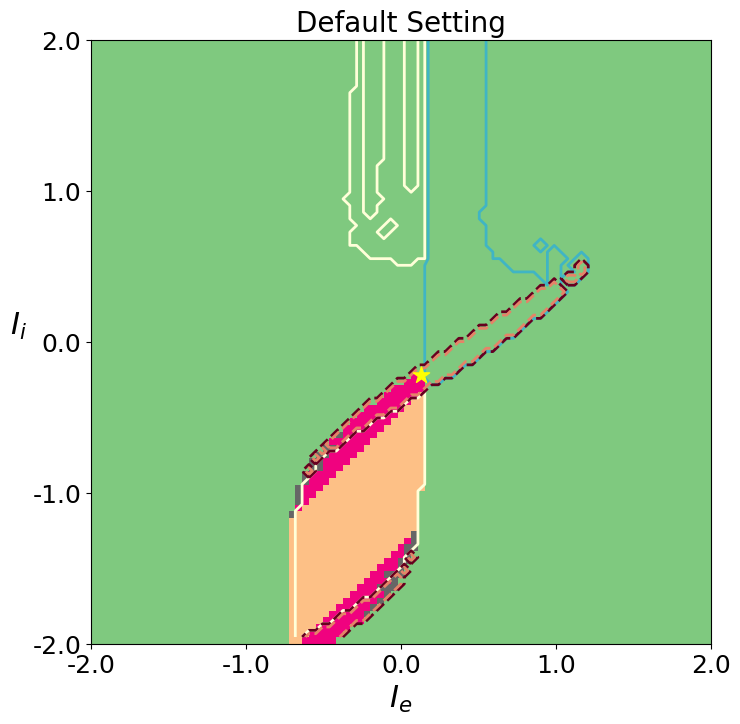

In [4]:
plotDiscreteMap(df_show, xaxis='I_e', yaxis='I_i', scatter=[ee, ii], 
                title = 'Default Setting', colorbar=False)

In [2]:
df_adap = pd.read_csv('csv/adaps_temporals.csv')

df_adap_show = df_adap[df_adap['I_e']>=-1]
df_adap_show = df_adap_show[df_adap_show['I_e']<=1]
df_adap_show = df_adap_show[df_adap_show['I_i']>=-1]
df_adap_show = df_adap_show[df_adap_show['I_i']<=1]


df_adap_show = df_adap_show[df_adap_show['p_random']==2]

In [3]:
import py.continuum1d as continuum1d
params=None
c1d = continuum1d.continuum1d()

1d Model initialised.


204
round=0, I_e=-0.17, I_i=-1.00, dom_frequ=108.6426


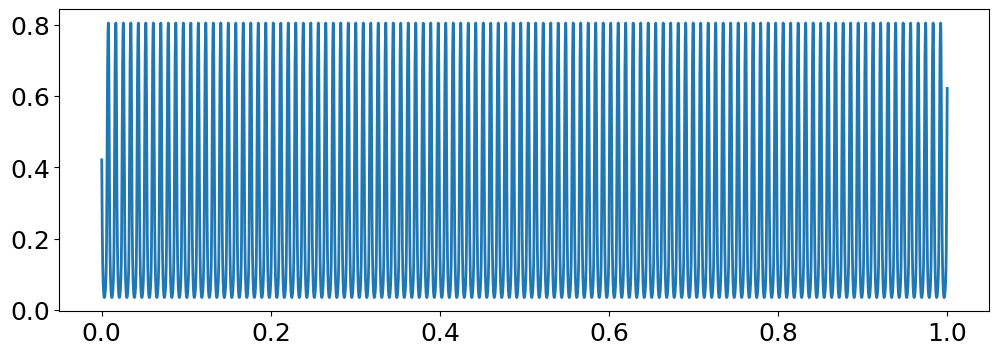

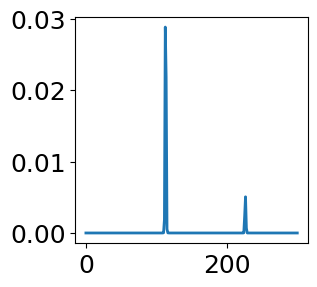

round=1, I_e=-0.13, I_i=-0.97, dom_frequ=112.3047
round=2, I_e=-0.13, I_i=-1.00, dom_frequ=112.3047
round=3, I_e=-0.10, I_i=-0.93, dom_frequ=115.9668
round=4, I_e=-0.10, I_i=-0.97, dom_frequ=114.7461
round=5, I_e=-0.10, I_i=-1.00, dom_frequ=114.7461
round=6, I_e=-0.07, I_i=-0.90, dom_frequ=118.4082
round=7, I_e=-0.07, I_i=-0.93, dom_frequ=117.1875
round=8, I_e=-0.07, I_i=-0.97, dom_frequ=117.1875


/Users/ronja/Documents/GitHub/neural-fields/py/analysis.py:32: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-params.beta_a*(x-params.mu_a)))
/Users/ronja/Documents/GitHub/neural-fields/py/analysis.py:25: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-params.beta_e*(x-params.mu_e)))
/Users/ronja/Documents/GitHub/neural-fields/py/analysis.py:29: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-params.beta_i*(x-params.mu_i)))


round=9, I_e=-0.07, I_i=-1.00, dom_frequ=115.9668


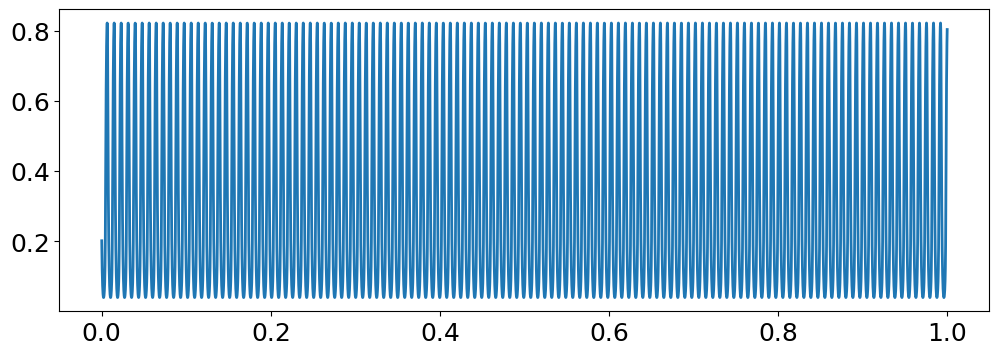

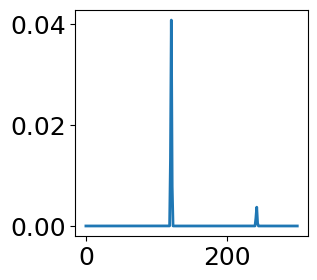

round=10, I_e=-0.03, I_i=-0.87, dom_frequ=120.8496
round=11, I_e=-0.03, I_i=-0.90, dom_frequ=119.6289
round=12, I_e=-0.03, I_i=-0.93, dom_frequ=118.4082
round=13, I_e=-0.03, I_i=-0.97, dom_frequ=118.4082
round=14, I_e=-0.03, I_i=-1.00, dom_frequ=118.4082


/Users/ronja/Documents/GitHub/neural-fields/py/analysis.py:29: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-params.beta_i*(x-params.mu_i)))


round=15, I_e=0.00, I_i=-0.83, dom_frequ=122.0703


/Users/ronja/Documents/GitHub/neural-fields/py/analysis.py:32: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-params.beta_a*(x-params.mu_a)))
/Users/ronja/Documents/GitHub/neural-fields/py/analysis.py:25: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-params.beta_e*(x-params.mu_e)))
/Users/ronja/Documents/GitHub/neural-fields/py/analysis.py:29: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-params.beta_i*(x-params.mu_i)))


round=16, I_e=0.00, I_i=-0.87, dom_frequ=120.8496


/Users/ronja/Documents/GitHub/neural-fields/py/analysis.py:25: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-params.beta_e*(x-params.mu_e)))
/Users/ronja/Documents/GitHub/neural-fields/py/analysis.py:29: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-params.beta_i*(x-params.mu_i)))


round=17, I_e=0.00, I_i=-0.90, dom_frequ=119.6289
round=18, I_e=0.00, I_i=-0.93, dom_frequ=119.6289
round=19, I_e=0.00, I_i=-0.97, dom_frequ=119.6289


/Users/ronja/Documents/GitHub/neural-fields/py/analysis.py:32: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-params.beta_a*(x-params.mu_a)))
/Users/ronja/Documents/GitHub/neural-fields/py/analysis.py:25: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-params.beta_e*(x-params.mu_e)))
/Users/ronja/Documents/GitHub/neural-fields/py/analysis.py:29: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-params.beta_i*(x-params.mu_i)))


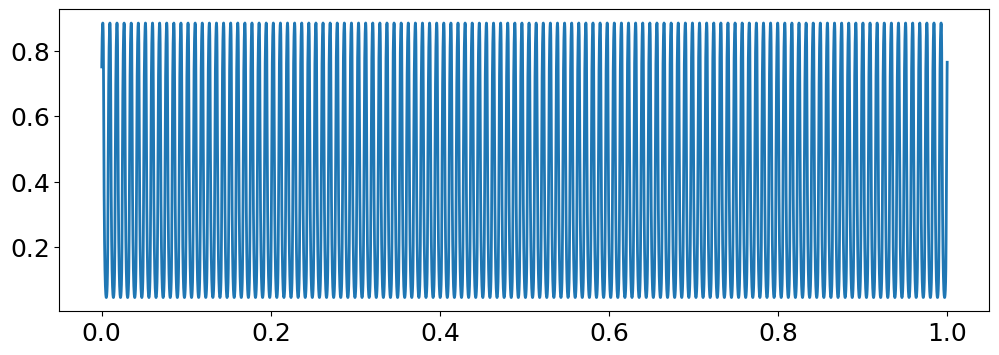

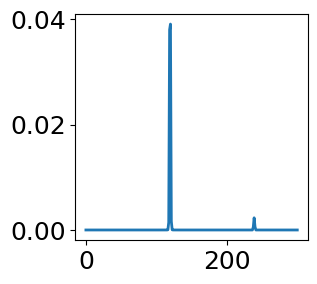

round=20, I_e=0.00, I_i=-1.00, dom_frequ=119.6289


/Users/ronja/Documents/GitHub/neural-fields/py/analysis.py:32: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-params.beta_a*(x-params.mu_a)))
/Users/ronja/Documents/GitHub/neural-fields/py/analysis.py:25: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-params.beta_e*(x-params.mu_e)))
/Users/ronja/Documents/GitHub/neural-fields/py/analysis.py:29: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-params.beta_i*(x-params.mu_i)))


round=21, I_e=0.03, I_i=-0.83, dom_frequ=122.0703
round=22, I_e=0.03, I_i=-0.87, dom_frequ=120.8496
round=23, I_e=0.03, I_i=-0.90, dom_frequ=120.8496


/Users/ronja/Documents/GitHub/neural-fields/py/analysis.py:32: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-params.beta_a*(x-params.mu_a)))
/Users/ronja/Documents/GitHub/neural-fields/py/analysis.py:25: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-params.beta_e*(x-params.mu_e)))
/Users/ronja/Documents/GitHub/neural-fields/py/analysis.py:29: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-params.beta_i*(x-params.mu_i)))


round=24, I_e=0.03, I_i=-0.93, dom_frequ=119.6289
round=25, I_e=0.03, I_i=-0.97, dom_frequ=119.6289
round=26, I_e=0.03, I_i=-1.00, dom_frequ=119.6289


/Users/ronja/Documents/GitHub/neural-fields/py/analysis.py:25: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-params.beta_e*(x-params.mu_e)))
/Users/ronja/Documents/GitHub/neural-fields/py/analysis.py:29: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-params.beta_i*(x-params.mu_i)))


round=27, I_e=0.07, I_i=-0.80, dom_frequ=122.0703
round=28, I_e=0.07, I_i=-0.83, dom_frequ=120.8496
round=29, I_e=0.07, I_i=-0.87, dom_frequ=120.8496
round=30, I_e=0.07, I_i=-0.90, dom_frequ=120.8496
round=31, I_e=0.07, I_i=-0.93, dom_frequ=120.8496
round=32, I_e=0.07, I_i=-0.97, dom_frequ=120.8496
round=33, I_e=0.07, I_i=-1.00, dom_frequ=120.8496
round=34, I_e=0.10, I_i=-0.77, dom_frequ=122.0703
round=35, I_e=0.10, I_i=-0.80, dom_frequ=120.8496
round=36, I_e=0.10, I_i=-0.83, dom_frequ=120.8496
round=37, I_e=0.10, I_i=-0.87, dom_frequ=120.8496
round=38, I_e=0.10, I_i=-0.90, dom_frequ=120.8496
round=39, I_e=0.10, I_i=-0.93, dom_frequ=120.8496


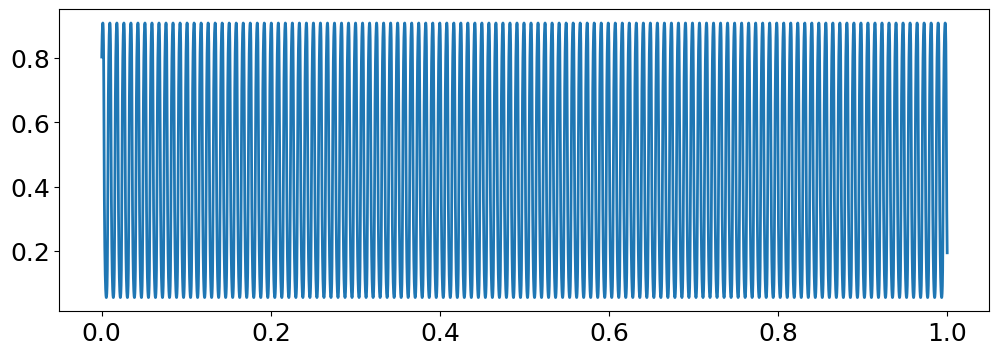

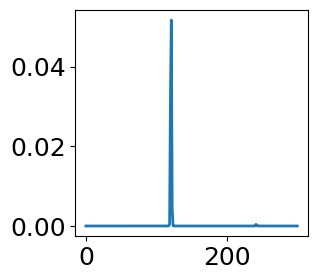

round=40, I_e=0.10, I_i=-0.97, dom_frequ=120.8496
round=41, I_e=0.10, I_i=-1.00, dom_frequ=120.8496
round=42, I_e=0.13, I_i=-0.73, dom_frequ=122.0703
round=43, I_e=0.13, I_i=-0.77, dom_frequ=120.8496
round=44, I_e=0.13, I_i=-0.80, dom_frequ=120.8496
round=45, I_e=0.13, I_i=-0.83, dom_frequ=119.6289
round=46, I_e=0.13, I_i=-0.87, dom_frequ=119.6289
round=47, I_e=0.13, I_i=-0.90, dom_frequ=119.6289
round=48, I_e=0.13, I_i=-0.93, dom_frequ=119.6289
round=49, I_e=0.13, I_i=-0.97, dom_frequ=119.6289


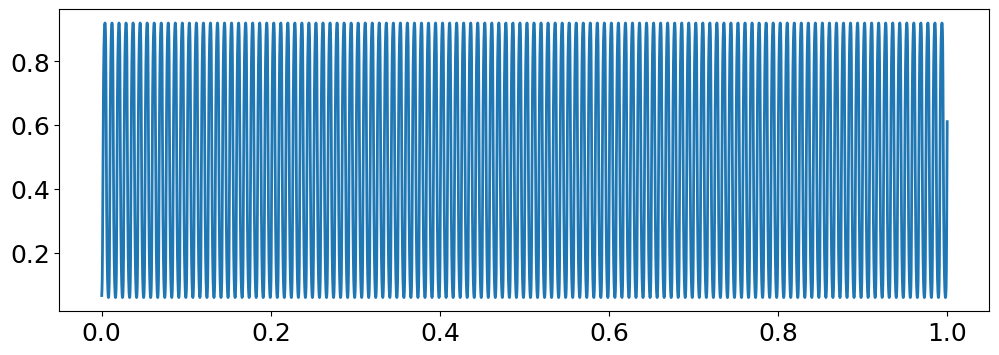

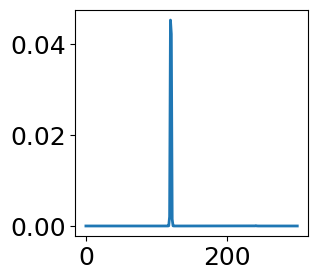

round=50, I_e=0.13, I_i=-1.00, dom_frequ=119.6289
round=51, I_e=0.17, I_i=-0.70, dom_frequ=120.8496
round=52, I_e=0.17, I_i=-0.73, dom_frequ=119.6289
round=53, I_e=0.17, I_i=-0.77, dom_frequ=119.6289
round=54, I_e=0.17, I_i=-0.80, dom_frequ=119.6289
round=55, I_e=0.17, I_i=-0.83, dom_frequ=119.6289
round=56, I_e=0.17, I_i=-0.87, dom_frequ=119.6289
round=57, I_e=0.17, I_i=-0.90, dom_frequ=119.6289
round=58, I_e=0.17, I_i=-0.93, dom_frequ=119.6289
round=59, I_e=0.17, I_i=-0.97, dom_frequ=119.6289
round=60, I_e=0.17, I_i=-1.00, dom_frequ=119.6289
round=61, I_e=0.20, I_i=-0.70, dom_frequ=118.4082
round=62, I_e=0.20, I_i=-0.73, dom_frequ=118.4082
round=63, I_e=0.20, I_i=-0.77, dom_frequ=118.4082
round=64, I_e=0.20, I_i=-0.80, dom_frequ=118.4082


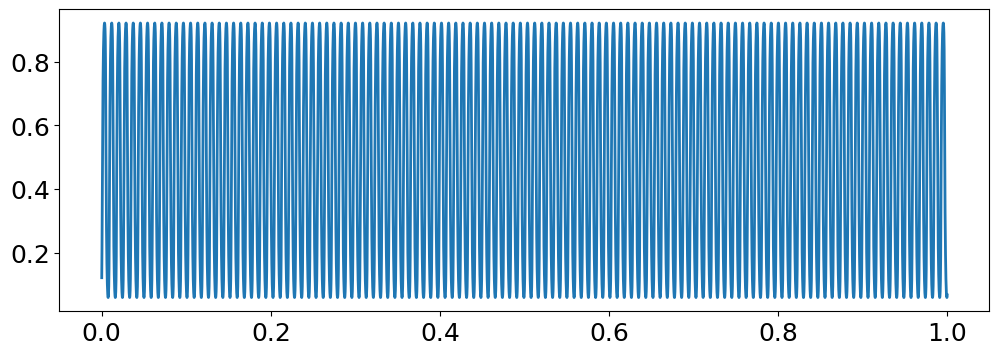

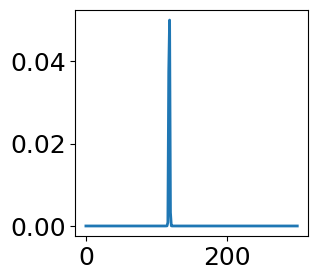

round=65, I_e=0.20, I_i=-0.83, dom_frequ=118.4082
round=66, I_e=0.20, I_i=-0.87, dom_frequ=118.4082
round=67, I_e=0.20, I_i=-0.90, dom_frequ=118.4082
round=68, I_e=0.20, I_i=-0.93, dom_frequ=118.4082
round=69, I_e=0.20, I_i=-0.97, dom_frequ=118.4082
round=70, I_e=0.20, I_i=-1.00, dom_frequ=118.4082
round=71, I_e=0.23, I_i=-0.67, dom_frequ=115.9668
round=72, I_e=0.23, I_i=-0.70, dom_frequ=115.9668
round=73, I_e=0.23, I_i=-0.73, dom_frequ=115.9668
round=74, I_e=0.23, I_i=-0.77, dom_frequ=115.9668
round=75, I_e=0.23, I_i=-0.80, dom_frequ=115.9668
round=76, I_e=0.23, I_i=-0.83, dom_frequ=115.9668
round=77, I_e=0.23, I_i=-0.87, dom_frequ=115.9668
round=78, I_e=0.23, I_i=-0.90, dom_frequ=117.1875
round=79, I_e=0.23, I_i=-0.93, dom_frequ=117.1875
round=80, I_e=0.23, I_i=-0.97, dom_frequ=117.1875
round=81, I_e=0.23, I_i=-1.00, dom_frequ=117.1875
round=82, I_e=0.27, I_i=-0.63, dom_frequ=113.5254
round=83, I_e=0.27, I_i=-0.67, dom_frequ=113.5254
round=84, I_e=0.27, I_i=-0.70, dom_frequ=113.5254


/Users/ronja/Documents/GitHub/neural-fields/py/analysis.py:25: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-params.beta_e*(x-params.mu_e)))
/Users/ronja/Documents/GitHub/neural-fields/py/analysis.py:29: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-params.beta_i*(x-params.mu_i)))


round=179, I_e=0.47, I_i=-0.80, dom_frequ=91.5527
round=180, I_e=0.47, I_i=-0.83, dom_frequ=91.5527
round=181, I_e=0.47, I_i=-0.87, dom_frequ=91.5527
round=182, I_e=0.47, I_i=-0.90, dom_frequ=92.7734
round=183, I_e=0.47, I_i=-0.93, dom_frequ=92.7734
round=184, I_e=0.47, I_i=-0.97, dom_frequ=92.7734
round=185, I_e=0.47, I_i=-1.00, dom_frequ=92.7734
round=186, I_e=0.50, I_i=-0.43, dom_frequ=78.1250
round=187, I_e=0.50, I_i=-0.47, dom_frequ=79.3457
round=188, I_e=0.50, I_i=-0.50, dom_frequ=79.3457
round=189, I_e=0.50, I_i=-0.53, dom_frequ=80.5664
round=190, I_e=0.50, I_i=-0.57, dom_frequ=80.5664
round=191, I_e=0.50, I_i=-0.60, dom_frequ=81.7871
round=192, I_e=0.50, I_i=-0.63, dom_frequ=81.7871
round=193, I_e=0.50, I_i=-0.67, dom_frequ=83.0078
round=194, I_e=0.50, I_i=-0.70, dom_frequ=83.0078
round=195, I_e=0.50, I_i=-0.73, dom_frequ=83.0078
round=196, I_e=0.50, I_i=-0.77, dom_frequ=84.2285
round=197, I_e=0.50, I_i=-0.80, dom_frequ=84.2285
round=198, I_e=0.50, I_i=-0.83, dom_frequ=84.2285


/Users/ronja/Documents/GitHub/neural-fields/py/analysis.py:25: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-params.beta_e*(x-params.mu_e)))
/Users/ronja/Documents/GitHub/neural-fields/py/analysis.py:29: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-params.beta_i*(x-params.mu_i)))


round=202, I_e=0.50, I_i=-0.97, dom_frequ=86.6699
round=203, I_e=0.50, I_i=-1.00, dom_frequ=86.6699


,I_e,I_i,dom_frequ,down_duration,up_duration
0,-0.166667,-1.0,108.642578,0.042973,0.030663
0,-0.133333,-0.966667,112.304688,0.040049,0.031186
0,-0.133333,-1.0,112.304688,0.039305,0.03193
0,-0.1,-0.933333,115.966797,0.037398,0.031587
0,-0.1,-0.966667,114.746094,0.03703,0.03269
...,...,...,...,...,...
0,0.5,-0.866667,85.449219,0.012657,0.080966
0,0.5,-0.9,85.449219,0.012183,0.08144
0,0.5,-0.933333,85.449219,0.01171,0.081913
0,0.5,-0.966667,86.669922,0.011037,0.081267


In [4]:
from py.analysis import computeFPs, checkFixPtsStability

a = df_adap_show#df_show[df_show['p_random']==2]
print(len(a))
ext_values = np.zeros((len(a), 2))

count = 0
for index, row in a.iterrows():
   # print(row)
    ext_values[count][0] = row['I_e']
    ext_values[count][1] = row['I_i']
    count+=1

ext_values

from py.funcs import getAvgPSD, getPSD
from py.params import setParams


df_columns=['I_e', 'I_i', 'dom_frequ', 'down_duration', 'up_duration']
df_new = pd.DataFrame(columns=df_columns)

count = 0
for array in ext_values:
    ee = array[0]
    ii = array[1]
    
    params={'I_e': ee, 'I_i': ii, 'b': 0.5, 'tau_a': 600, 'end_t': 10*1000}
    ps = setParams(params)
    
    fps = computeFPs(ps)
    stab = checkFixPtsStability(fps, ps)
    
    exc, inh = c1d.run(ps, itype='inte_adaptation')#, fp = fps[0])
    
    exc_test = exc.T[60,int(-8*1000*(1/ps.dt)):]
    
    frequs, PSD = getPSD(exc_test, int(1000*(1/ps.dt)))

    
    dom_frequ = frequs[np.argmax(PSD)]    
    
    if count in [1, 10, 20, 40, 50, 65]: #[10, 100, 200, 300, 380]:
        plt.figure(figsize=(12,4))
        
        plt.plot(np.linspace(0,1,10000), exc.T[60,-10000:])#, vmin=0, vmax=1, aspect='auto')
        plt.show()
      
        plt.figure(figsize=(3,3))
        plt.plot(frequs, PSD)
        plt.show()
    
    e = exc_test
    up_steps = sum(x>=0.2 for x in e)
    down_steps = sum(x<0.2 for x in e)
    avg_steps_in_down = down_steps/dom_frequ
    avg_steps_in_up = up_steps/dom_frequ
    
    avg_up = avg_steps_in_up*ps.dt*(1/1000)
    avg_down = avg_steps_in_down*ps.dt*(1/1000)

    values = [[ee, ii, dom_frequ, avg_down, avg_up]]
    df_temp = pd.DataFrame(values, columns=df_columns)
    df_new = pd.concat([df_new, df_temp])
    
    print('round=%i, I_e=%.2f, I_i=%.2f, dom_frequ=%.4f' %(count, ee, ii, dom_frequ))
    count+=1
    
    
    
df_new


In [6]:
df_new.to_csv('adaps_temp_frequs.csv')

In [ ]:
#plt.plot(frequs, PSD)
df_new.plot.hist(column='dom_frequ', density=True, alpha=0.5)

In [132]:
#trial to determine durations
e = exc.T[60, -int(1*1000*(1/ps.dt)):]
up_steps = sum(x>=0.2 for x in e)
down_steps = sum(x<0.2 for x in e)
avg_steps_in_down = down_steps/dom_frequ
avg_steps_in_up = up_steps/dom_frequ

avg_up = avg_steps_in_up*ps.dt*(1/1000)
avg_down = avg_steps_in_down*ps.dt*(1/1000)
(avg_up+avg_down)*1000*(1/ps.dt)*dom_frequ

10000.0

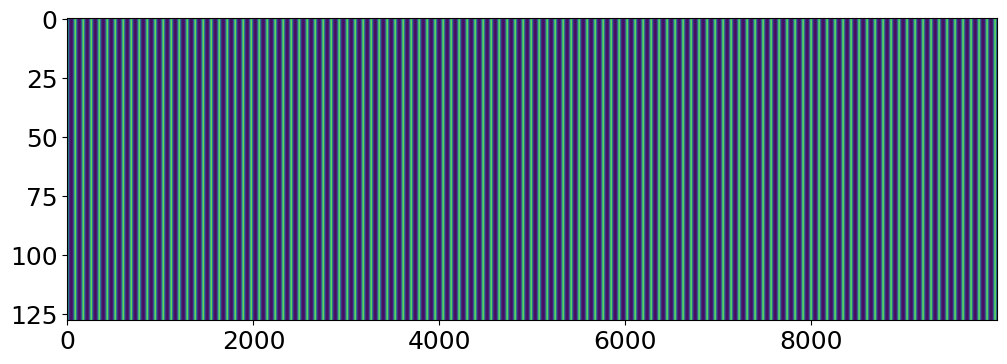

In [125]:
plt.figure(figsize=(12,4))
plt.imshow(exc.T[:,-10000:], vmin=0, vmax=1, aspect='auto')

In [61]:
exc.T[:,-10000:]

array([[0.79159756, 0.80154898, 0.80890322, ..., 0.2443452 , 0.22018741,
        0.19846768],
       [0.79159756, 0.80154898, 0.80890322, ..., 0.2443452 , 0.22018741,
        0.19846768],
       [0.79159756, 0.80154898, 0.80890322, ..., 0.2443452 , 0.22018741,
        0.19846768],
       ...,
       [0.79159756, 0.80154898, 0.80890322, ..., 0.2443452 , 0.22018741,
        0.19846768],
       [0.79159756, 0.80154898, 0.80890322, ..., 0.2443452 , 0.22018741,
        0.19846768],
       [0.79159756, 0.80154898, 0.80890322, ..., 0.2443452 , 0.22018741,
        0.19846768]])

In [9]:
a = df_show[df_show['stability']==0]
#b = a[a['stability']==2]
a

,Unnamed: 0,I_e,I_i,stability,turing,p_random,p_down,wavenumber
168,0,-0.4,-2.0,0,0,1,1,NaN
169,0,-0.4,-1.8,0,0,3,3,NaN
170,0,-0.4,-1.6,0,0,2,2,NaN
171,0,-0.4,-1.4,0,0,2,2,NaN
172,0,-0.4,-1.2,0,0,2,2,NaN
173,0,-0.4,-1.0,0,0,2,2,NaN
174,0,-0.4,-0.8,0,0,3,3,NaN
182,0,-0.4,0.8,0,0,1,1,NaN
183,0,-0.4,1.0,0,0,1,1,NaN
185,0,-0.4,1.4,0,0,1,1,NaN


In [56]:
a = df_show[df_show['I_e']>0.6]
a = a[a['I_i']>0]
b = a[a['p_down']==4]
b

,Unnamed: 0,I_e,I_i,stability,turing,p_random,p_down


In [58]:
df_show[df_show['p_random']==4]

,Unnamed: 0,I_e,I_i,stability,turing,p_random,p_down
1053,0,-0.675,-1.000,0,0,4,4
1054,0,-0.675,-0.975,1,1,4,4
1134,0,-0.650,-1.000,0,0,4,4
1135,0,-0.650,-0.975,0,0,4,4
1136,0,-0.650,-0.950,0,0,4,4
1137,0,-0.650,-0.925,1,1,4,4
1217,0,-0.625,-0.950,0,0,4,4
1218,0,-0.625,-0.925,0,0,4,4
1219,0,-0.625,-0.900,1,1,4,4
1220,0,-0.625,-0.875,1,1,4,4


In [34]:
df2 = pd.read_csv('mui_05.csv')

/Users/ronja/Documents/GitHub/neural-fields/py/plots/plotting.py:175: UserWarning: No contour levels were found within the data range.
  ax.contour(turings, origin='lower', vmin=0, vmax=1, levels=0, colors='black', linestyles='dashed')
/Users/ronja/Documents/GitHub/neural-fields/py/plots/plotting.py:188: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=xlabels)
/Users/ronja/Documents/GitHub/neural-fields/py/plots/plotting.py:190: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=ylabels)


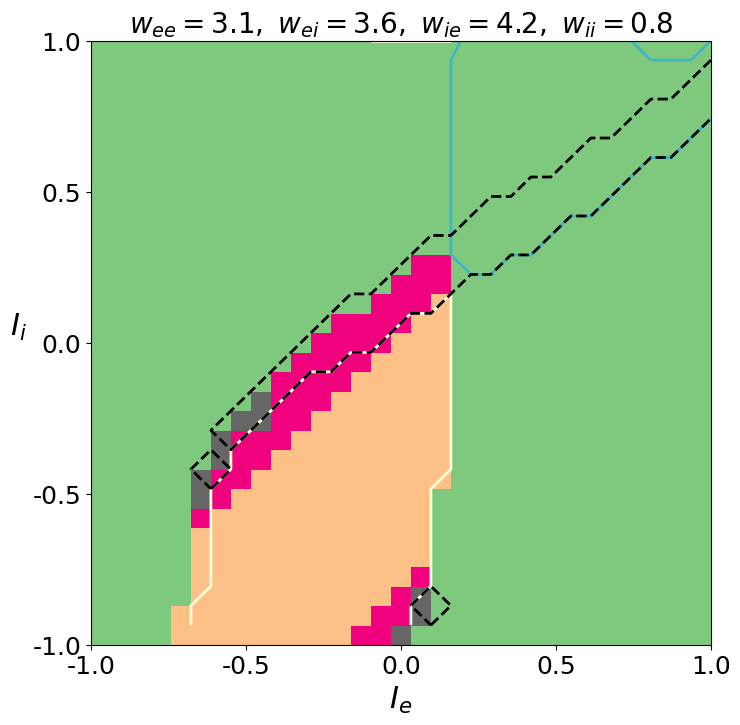

In [26]:
plotDiscreteMap(df2, title = r'$w_{ee}=3.1,\ w_{ei}=3.6,\ w_{ie}=4.2,\ w_{ii}=0.8$', colorbar=False)

In [27]:
df_show[df_show['p_random']==4]

,Unnamed: 0,I_e,I_i,stability,turing,turing_hopf,p_random
155,0,-0.666667,-1.000000,0,0,0,4
188,0,-0.600000,-0.866667,1,1,0,4
220,0,-0.533333,-0.800000,0,0,0,4
221,0,-0.533333,-0.733333,1,1,0,4
252,0,-0.466667,-0.733333,0,0,0,4
253,0,-0.466667,-0.666667,1,1,0,4


In [33]:
from py.params import setParams
from py.analysis import computeFPs, checkFixPtsStability, a_jkValues, det, tr

sigma = 0.245 #b #2.8550 #a
tau = 2.4201

ee = -0.525
ii = -0.80

params={'I_e': ee, 'I_i': ii, 'end_t': 5000}#, 'sigma_i': sigma, 'tau_i': tau, 'length': 100, 'n': 256}
ps = setParams(params)

fps = computeFPs(ps)

stab = checkFixPtsStability(fps, ps)

a_ee, a_ei, a_ie, a_ii = a_jkValues(fps[0], ps)

l=61
k = np.linspace(-2,2,l)
determinant = det(k, a_ee, a_ei, a_ie, a_ii, ps)
trace = tr(k, a_ee, a_ii, ps)
zero = np.zeros(l)

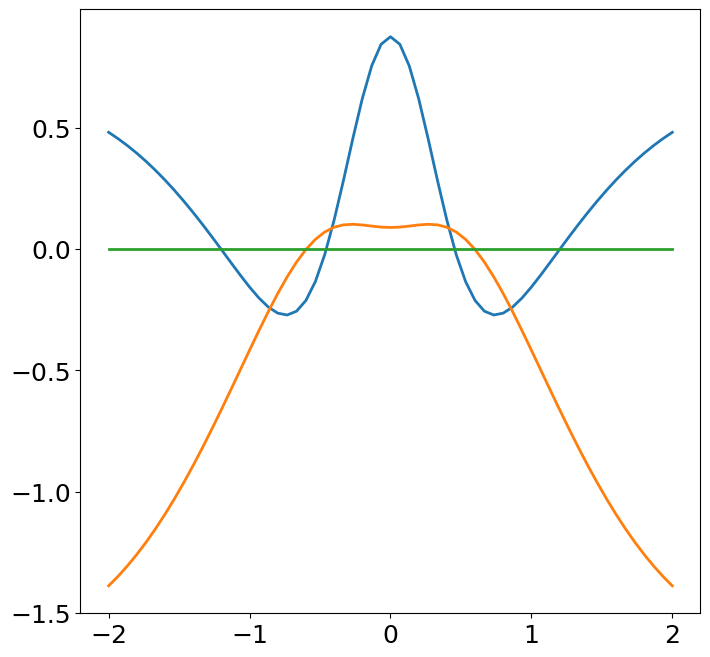

In [34]:
import matplotlib.pyplot as plt

plt.plot(k, determinant, k, trace)
plt.plot(k, zero)

In [109]:
PSD, frequs

(array([1.22619930e-04, 6.39055505e-04, 5.20516176e-04, 2.42940459e-04,
        8.40299071e-05, 1.97630212e-05, 2.57637402e-06, 1.15640726e-06,
        2.08750856e-06, 2.03664724e-06, 1.28559732e-06, 5.66385028e-07,
        1.77820996e-07, 6.51136131e-08, 7.26874365e-08, 9.05079385e-08,
        8.17742475e-08, 5.45277070e-08, 2.76128972e-08, 1.18968130e-08,
        7.29620892e-09, 8.06889311e-09, 8.87250036e-09, 7.62989372e-09,
        5.04931582e-09, 2.68814708e-09, 1.43152389e-09, 1.16447184e-09,
        1.27140912e-09, 1.25349525e-09, 9.90710947e-10, 6.33086034e-10,
        3.62534695e-10, 2.44486607e-10, 2.28875212e-10, 2.31928485e-10,
        2.05506011e-10, 1.51956245e-10, 9.79748931e-11, 6.38539810e-11,
        5.10400657e-11, 4.85332384e-11, 4.52279214e-11, 3.71494610e-11,
        2.67629973e-11, 1.81922351e-11, 1.34059415e-11, 1.15728503e-11,
        1.06770722e-11, 9.31612230e-12, 7.32709807e-12, 5.31973219e-12,
        3.87136231e-12, 3.09896926e-12, 2.72896270e-12, 2.424219